In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
response = requests.get('https://www.soccerstats.com/pmatch.asp?league=france&stats=273-12-3-2021')
soup = BeautifulSoup(response.text, "html.parser")


<!DOCTYPE html>

<html lang="en">
<head>
<script>
// Pause adsense ads
(adsbygoogle=window.adsbygoogle||[]).pauseAdRequests=1;
</script>
<script async="true" type="text/javascript">
(function() {
  var host = window.location.hostname;
  var element = document.createElement('script');
  var firstScript = document.getElementsByTagName('script')[0];
  var url = 'https://quantcast.mgr.consensu.org'
    .concat('/choice/', '713JMgae9AkWE', '/', host, '/choice.js')
  var uspTries = 0;
  var uspTriesLimit = 3;
  element.async = true;
  element.type = 'text/javascript';
  element.src = url;

  firstScript.parentNode.insertBefore(element, firstScript);

  function makeStub() {
    var TCF_LOCATOR_NAME = '__tcfapiLocator';
    var queue = [];
    var win = window;
    var cmpFrame;

    function addFrame() {
      var doc = win.document;
      var otherCMP = !!(win.frames[TCF_LOCATOR_NAME]);

      if (!otherCMP) {
        if (doc.body) {
          var iframe = doc.createElement('iframe');

   
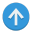

In [78]:
from requests import get

BeautifulSoup(get('https://www.soccerstats.com/pmatch.asp?league=france&stats=273-12-3-2021').text, "html.parser")

In [20]:
def init_dico_data():
#Initialize Dico data
    dico_data = {}
    dico_keys = ['tm1_name', 'tm2_name', 'tm1_points_h', 'tm1_PPGH_h', 'tm1_GS_h', 'tm1_GC_h', 'tm0_GS_h',\
                 'tm2_points_a', 'tm2_PPGA_a', 'tm2_GS_a', 'tm2_GC_a', 'tm0_GS_a', 'tm0_PPGH', 'tm1_wins',\
                 'tm2_wins', 'tm0_wins', 'tm1_defeats', 'tm2_defeats', 'tm0_defeats', 'tm1_GSG', 'tm2_GSG',\
                 'tm0_GSG', 'tm1_GCG', 'tm2_GCG', 'tm0_GCG', 'tm1_D', 'tm2_D', 'tm0_D', 'tm1_TGG', 'tm2_TGG',\
                 'tm0_TGG', 'tm1_25', 'tm2_25', 'tm0_25', 'tm1_35', 'tm2_35', 'tm0_35', 'tm1_BTS', 'tm2_BTS',\
                 'tm0_BTS', 'tm0_PPGH_h', 'tm1_wins_h', 'tm0_wins_h', 'tm1_defeats_h', 'tm0_defeats_h',\
                 'tm1_GSG_h', 'tm0_GSG_h', 'tm1_GCG_h', 'tm0_GCG_h', 'tm1_D_h', 'tm0_D_h', 'tm1_TGG_h',\
                 'tm0_TGG_h', 'tm1_25_h', 'tm0_25_h', 'tm1_35_h', 'tm0_35_h', 'tm1_BTS_h', 'tm0_BTS_h',\
                 'tm0_PPGH_a', 'tm2_wins_a', 'tm0_wins_a', 'tm2_defeats_a', 'tm0_defeats_a', 'tm2_GSG_a',\
                 'tm0_GSG_a', 'tm2_GCG_a', 'tm0_GCG_a', 'tm2_D_a', 'tm0_D_a', 'tm2_TGG_a', 'tm0_TGG_a',\
                 'tm2_25_a', 'tm0_25_a', 'tm2_35_a', 'tm0_35_a', 'tm2_BTS_a', 'tm0_BTS_a']
    for k in dico_keys :
        dico_data[k] = []
    return dico_data

dico_data = init_dico_data()

In [31]:
import re
dico_data = {}

scores = soup.find_all(text=re.compile('Home and away records'))
divs = [score.parent.parent.parent.parent for score in scores]
divs

[<table bgcolor="#cccccc" cellpadding="2" cellspacing="0" width="99%">
 <tr class="trow3" height="30"><td colspan="5" style="padding-left:5px;" valign="middle">
 <h2>Home and away records</h2>
 </td></tr>
 <tr bgcolor="#999999"><td height="25" style="padding-left:5px;" width="57%">
 <font color="#fafafa"><b>Home / Away points</b></font>
 </td><td colspan="2">
 <font color="#fafafa">Home</font>
 </td><td colspan="2">
 <font color="#fafafa">Away</font>
 </td></tr>
 <tr class="trow3"><td height="28"> 
 % Points
 </td>
 <td width="55">
 <div class="graphwideindex"><div class="bargray" style="width:36.90px;"></div></div>
 </td>
 <td align="left">75%</td>
 <td width="55">
 <div class="graphwideindex"><div class="bargray" style="width:12.30px;"></div></div>
 </td>
 <td align="left">25%</td>
 </tr>
 <tr bgcolor="#999999"><td colspan="5" height="25" style="padding-left:5px;" width="60%"><font color="#fafafa"><b>Home / Away PPG</b></font></td></tr>
 <tr class="trow3" height="20">
 <td colspan="2

In [36]:
#Home and away records
scores = soup.find_all(text=re.compile('Home and away records'))
divs = [score.parent.parent.parent.parent for score in scores]

tm1_records = divs[0].find_all('tr')
dico_data['tm1_points_h'] = tm1_records[2].find_all('td')[2].text.replace('%','') #home points in %
dico_data['tm1_PPGH_h'] = tm1_records[4].find_all("td")[1].text #  Points Per Game at Home
dico_data['tm1_GS_h'] = tm1_records[7].find_all('td')[2].text.replace('%','') # goals score in %
dico_data['tm1_GC_h'] = tm1_records[8].find_all('td')[2].text.replace('%','') # goals conceded in %
dico_data['tm0_GS_h'] = tm1_records[9].find_all('td')[2].text.replace('%','')#  League average (% goals)

tm2_records = divs[1].find_all('tr')
dico_data['tm2_points_a'] = tm2_records[2].find_all('td')[4].text.replace('%','') #home points in %
dico_data['tm2_PPGA_a'] = tm2_records[5].find_all("td")[1].text  # Points Per Game away
dico_data['tm2_GS_a'] = tm2_records[7].find_all('td')[4].text.replace('%','') # goals score in %
dico_data['tm2_GC_a'] = tm2_records[8].find_all('td')[4].text.replace('%','') # goals conceded in %
dico_data['tm0_GS_a'] = tm2_records[9].find_all('td')[4].text.replace('%','')#  League average (% goals)

dico_data

{'tm1_points_h': '75',
 'tm1_PPGH_h': '1.69',
 'tm1_GS_h': '68',
 'tm1_GC_h': '47',
 'tm0_GS_h': '51',
 'tm2_points_a': '60',
 'tm2_PPGA_a': '0.56',
 'tm2_GS_a': '75',
 'tm2_GC_a': '61',
 'tm0_GS_a': '49'}

In [39]:
# stats against league average
scores = soup.find_all(text=re.compile('stats against league average'))
divs = [score.parent.parent.parent.parent for score in scores]

tm1_stats = divs[0].find_all('tr')[1].find('div').find_all('div')[0]
tm2_stats = divs[1].find_all('tr')[1].find('div').find_all('div')[0]

dico_data['tm0_PPGH'] = tm1_stats.find_all('tr')[1].find_all('font')[1].text
dico_data['tm1_wins'] = tm1_stats.find_all('tr')[4].find_all('font')[0].text.replace('%','') # % Wins 
dico_data['tm2_wins'] = tm2_stats.find_all('tr')[4].find_all('font')[0].text.replace('%','')
dico_data['tm0_wins'] = tm1_stats.find_all('tr')[4].find_all('font')[1].text.replace('%','')
dico_data['tm1_defeats'] = tm1_stats.find_all('tr')[5].find_all('font')[0].text.replace('%','') # % Defeats 
dico_data['tm2_defeats'] = tm2_stats.find_all('tr')[5].find_all('font')[0].text.replace('%','')
dico_data['tm0_defeats'] = tm1_stats.find_all('tr')[5].find_all('font')[1].text.replace('%','')
dico_data['tm1_GSG'] = tm1_stats.find_all('tr')[7].find_all('font')[0].text # Goals scored per game
dico_data['tm2_GSG'] = tm2_stats.find_all('tr')[7].find_all('font')[0].text
dico_data['tm0_GSG'] = tm1_stats.find_all('tr')[7].find_all('font')[1].text
dico_data['tm1_GCG'] = tm1_stats.find_all('tr')[9].find_all('font')[0].text # Goals conceded per game
dico_data['tm2_GCG'] = tm2_stats.find_all('tr')[9].find_all('font')[0].text
dico_data['tm0_GCG'] = tm1_stats.find_all('tr')[9].find_all('font')[1].text
dico_data['tm1_D'] = tm1_stats.find_all('tr')[11].find_all('font')[0].text.replace('%','') # % Draws
dico_data['tm2_D'] = tm2_stats.find_all('tr')[11].find_all('font')[0].text.replace('%','')
dico_data['tm0_D'] = tm1_stats.find_all('tr')[11].find_all('font')[1].text.replace('%','')
dico_data['tm1_TGG'] = tm1_stats.find_all('tr')[13].find_all('font')[0].text # Total goals per game
dico_data['tm2_TGG'] = tm2_stats.find_all('tr')[13].find_all('font')[0].text
dico_data['tm0_TGG'] = tm1_stats.find_all('tr')[13].find_all('font')[1].text
dico_data['tm1_25'] = tm1_stats.find_all('tr')[15].find_all('font')[0].text.replace('%','') # % matches over 2.5 goals
dico_data['tm2_25'] = tm2_stats.find_all('tr')[15].find_all('font')[0].text.replace('%','')
dico_data['tm0_25'] = tm1_stats.find_all('tr')[15].find_all('font')[1].text.replace('%','')
dico_data['tm1_35'] = tm1_stats.find_all('tr')[17].find_all('font')[0].text.replace('%','') # % matches over 3.5 goals
dico_data['tm2_35'] = tm2_stats.find_all('tr')[17].find_all('font')[0].text.replace('%','')
dico_data['tm0_35'] = tm1_stats.find_all('tr')[17].find_all('font')[1].text.replace('%','')
dico_data['tm1_BTS'] = tm1_stats.find_all('tr')[19].find_all('font')[0].text.replace('%','') # % matches where both teams scored
dico_data['tm2_BTS'] = tm2_stats.find_all('tr')[19].find_all('font')[0].text.replace('%','')
dico_data['tm0_BTS'] = tm1_stats.find_all('tr')[19].find_all('font')[1].text.replace('%','')

#tm1 and tm0 HOME
tm1_stats = divs[0].find_all('tr')[1].find('div').find_all('div')[1]
# tm1_PPGH'] = tm1_stats.find_all('tr')[1].find_all('font')[0].text # Points per game
dico_data['tm0_PPGH_h'] = tm1_stats.find_all('tr')[1].find_all('font')[1].text
dico_data['tm1_wins_h'] = tm1_stats.find_all('tr')[4].find_all('font')[0].text.replace('%','') # % Wins 
dico_data['tm0_wins_h'] = tm1_stats.find_all('tr')[4].find_all('font')[1].text.replace('%','')
dico_data['tm1_defeats_h'] = tm1_stats.find_all('tr')[5].find_all('font')[0].text.replace('%','') # % Defeats 
dico_data['tm0_defeats_h'] = tm1_stats.find_all('tr')[5].find_all('font')[1].text.replace('%','')
dico_data['tm1_GSG_h'] = tm1_stats.find_all('tr')[7].find_all('font')[0].text # Goals scored per game
dico_data['tm0_GSG_h'] = tm1_stats.find_all('tr')[7].find_all('font')[1].text
dico_data['tm1_GCG_h'] = tm1_stats.find_all('tr')[9].find_all('font')[0].text # Goals conceded per game
dico_data['tm0_GCG_h'] = tm1_stats.find_all('tr')[9].find_all('font')[1].text
dico_data['tm1_D_h'] = tm1_stats.find_all('tr')[11].find_all('font')[0].text.replace('%','') # % Draws
dico_data['tm0_D_h'] = tm1_stats.find_all('tr')[11].find_all('font')[1].text.replace('%','')
dico_data['tm1_TGG_h'] = tm1_stats.find_all('tr')[13].find_all('font')[0].text # Total goals per game
dico_data['tm0_TGG_h'] = tm1_stats.find_all('tr')[13].find_all('font')[1].text
dico_data['tm1_25_h'] = tm1_stats.find_all('tr')[15].find_all('font')[0].text.replace('%','') # % matches over 2.5 goals
dico_data['tm0_25_h'] = tm1_stats.find_all('tr')[15].find_all('font')[1].text.replace('%','')
dico_data['tm1_35_h'] = tm1_stats.find_all('tr')[17].find_all('font')[0].text.replace('%','') # % matches over 3.5 goals
dico_data['tm0_35_h'] = tm1_stats.find_all('tr')[17].find_all('font')[1].text.replace('%','')
dico_data['tm1_BTS_h'] = tm1_stats.find_all('tr')[19].find_all('font')[0].text.replace('%','') # % matches where both teams scored
dico_data['tm0_BTS_h'] = tm1_stats.find_all('tr')[19].find_all('font')[1].text.replace('%','')

#tm2 and tm0 AWAY
tm2_stats = divs[1].find_all('tr')[1].find('div').find_all('div')[2]
# tm1_PPGH'] = tm1_stats.find_all('tr')[1].find_all('font')[0].text # Points per game
dico_data['tm0_PPGH_a'] = tm2_stats.find_all('tr')[1].find_all('font')[1].text
dico_data['tm2_wins_a'] = tm2_stats.find_all('tr')[4].find_all('font')[0].text.replace('%','') # % Wins 
dico_data['tm0_wins_a'] = tm2_stats.find_all('tr')[4].find_all('font')[1].text.replace('%','')
dico_data['tm2_defeats_a'] = tm2_stats.find_all('tr')[5].find_all('font')[0].text.replace('%','') # % Defeats 
dico_data['tm0_defeats_a'] = tm2_stats.find_all('tr')[5].find_all('font')[1].text.replace('%','')
dico_data['tm2_GSG_a'] = tm2_stats.find_all('tr')[7].find_all('font')[0].text # Goals scored per game
dico_data['tm0_GSG_a'] = tm2_stats.find_all('tr')[7].find_all('font')[1].text
dico_data['tm2_GCG_a'] = tm2_stats.find_all('tr')[9].find_all('font')[0].text # Goals conceded per game
dico_data['tm0_GCG_a'] = tm2_stats.find_all('tr')[9].find_all('font')[1].text
dico_data['tm2_D_a'] = tm2_stats.find_all('tr')[11].find_all('font')[0].text.replace('%','') # % Draws
dico_data['tm0_D_a'] = tm2_stats.find_all('tr')[11].find_all('font')[1].text.replace('%','')
dico_data['tm2_TGG_a'] = tm2_stats.find_all('tr')[13].find_all('font')[0].text # Total goals per game
dico_data['tm0_TGG_a'] = tm2_stats.find_all('tr')[13].find_all('font')[1].text
dico_data['tm2_25_a'] = tm2_stats.find_all('tr')[15].find_all('font')[0].text.replace('%','') # % matches over 2.5 goals
dico_data['tm0_25_a'] = tm2_stats.find_all('tr')[15].find_all('font')[1].text.replace('%','')
dico_data['tm2_35_a'] = tm2_stats.find_all('tr')[17].find_all('font')[0].text.replace('%','') # % matches over 3.5 goals
dico_data['tm0_35_a'] = tm2_stats.find_all('tr')[17].find_all('font')[1].text.replace('%','')
dico_data['tm2_BTS_a'] = tm2_stats.find_all('tr')[19].find_all('font')[0].text.replace('%','') # % matches where both teams scored
dico_data['tm0_BTS_a'] = tm2_stats.find_all('tr')[19].find_all('font')[1].text.replace('%','')
dico_data

{'tm1_points_h': '75',
 'tm1_PPGH_h': '1.69',
 'tm1_GS_h': '68',
 'tm1_GC_h': '47',
 'tm0_GS_h': '51',
 'tm2_points_a': '60',
 'tm2_PPGA_a': '0.56',
 'tm2_GS_a': '75',
 'tm2_GC_a': '61',
 'tm0_GS_a': '49',
 'tm0_PPGH': '1.37',
 'tm1_wins': '31',
 'tm2_wins': '6',
 'tm0_wins': '37',
 'tm1_defeats': '50',
 'tm2_defeats': '66',
 'tm0_defeats': '37',
 'tm1_GSG': '1.38',
 'tm2_GSG': '0.63',
 'tm0_GSG': '1.35',
 'tm1_GCG': '1.72',
 'tm2_GCG': '1.75',
 'tm0_GCG': '1.35',
 'tm1_D': '19',
 'tm2_D': '28',
 'tm0_D': '26',
 'tm1_TGG': '3.09',
 'tm2_TGG': '2.38',
 'tm0_TGG': '2.71',
 'tm1_25': '66',
 'tm2_25': '41',
 'tm0_25': '52',
 'tm1_35': '44',
 'tm2_35': '31',
 'tm0_35': '30',
 'tm1_BTS': '59',
 'tm2_BTS': '41',
 'tm0_BTS': '53',
 'tm0_PPGH_h': '1.38',
 'tm1_wins_h': '50',
 'tm0_wins_h': '38',
 'tm1_defeats_h': '31',
 'tm0_defeats_h': '37',
 'tm1_GSG_h': '1.88',
 'tm0_GSG_h': '1.38',
 'tm1_GCG_h': '1.63',
 'tm0_GCG_h': '1.33',
 'tm1_D_h': '19',
 'tm0_D_h': '26',
 'tm1_TGG_h': '3.50',
 'tm0_TG

In [55]:
dico_data={}

#Scoring patterns
scores = soup.find_all(text=re.compile('Scoring patterns'))
divs = [score.parent.parent.parent.parent for score in scores]

tm1_patterns = divs[0].find_all('tr')
dico_data['tm1_ClS_h'] = tm1_patterns[2].find_all('td')[1].text.replace('%','') # Clean sheets
dico_data['tm1_WtN_h'] = tm1_patterns[3].find_all('td')[1].text.replace('%','') # Won-to-nil
dico_data['tm1_SiBH_h'] = tm1_patterns[4].find_all('td')[1].text.replace('%','') # Scored in both halves
dico_data['tm1_BoTS_h'] = tm1_patterns[5].find_all('td')[1].text.replace('%','') # Both teams scored
dico_data['tm1_FtS_h'] = tm1_patterns[6].find_all('td')[1].text.replace('%','') # Failed to score
dico_data['tm1_LtN_h'] = tm1_patterns[7].find_all('td')[1].text.replace('%','') # Lost-to-nil
dico_data['tm1_CiBH_h'] = tm1_patterns[8].find_all('td')[1].text.replace('%','') # Conceded in both halves

tm2_patterns = divs[1].find_all('tr')
dico_data['tm2_ClS_h'] = tm2_patterns[2].find_all('td')[2].text.replace('%','') # Clean sheets
dico_data['tm2_WtN_h'] = tm2_patterns[3].find_all('td')[2].text.replace('%','') # Won-to-nil
dico_data['tm2_SiBH_h'] = tm2_patterns[4].find_all('td')[2].text.replace('%','') # Scored in both halves
dico_data['tm2_BoTS_h'] = tm2_patterns[5].find_all('td')[2].text.replace('%','') # Both teams scored
dico_data['tm2_FtS_h'] = tm2_patterns[6].find_all('td')[2].text.replace('%','') # Failed to score
dico_data['tm2_LtN_h'] = tm2_patterns[7].find_all('td')[2].text.replace('%','') # Lost-to-nil
dico_data['tm2_CiBH_h'] = tm2_patterns[8].find_all('td')[2].text.replace('%','') # Conceded in both halves

dico_data

{'tm1_ClS_h': '19',
 'tm1_WtN_h': '12',
 'tm1_SiBH_h': '25',
 'tm1_BoTS_h': '75',
 'tm1_FtS_h': '12',
 'tm1_LtN_h': '6',
 'tm1_CiBH_h': '44',
 'tm2_ClS_h': '6',
 'tm2_WtN_h': '0',
 'tm2_SiBH_h': '12',
 'tm2_BoTS_h': '56',
 'tm2_FtS_h': '44',
 'tm2_LtN_h': '38',
 'tm2_CiBH_h': '38'}

In [ ]:
Clean sheets	19%	6%	12%
Won-to-nil	0%	0%	0%
Scored in both halves	6%	12%	9%
Both teams scored	25%	56%	41%
Failed to score	75%	44%	59%
Lost-to-nil	56%	38%	47%
Conceded in both halves	25%	38%	31%

# OLD SCRAPING

In [14]:
def scrape_data_from_url(dico_data, soup):
    
    #Separate columns teams
    datas = soup.find_all('div', class_= "six columns")
    tm1 = datas[4].find_all('table') #infos on team 1
    tm2 = datas[5].find_all('table') #infos on team 2

    #------team names
    #tm0 = average for the league
    dico_data['tm1_name'].append(tm1[0].find('h2').text)
    dico_data['tm2_name'].append(tm2[0].find('h2').text)

    #------team names
    #tm0 = average for the league
    dico_data['tm1_name'].append(tm1[0].find('h2').text)
    dico_data['tm2_name'].append(tm2[0].find('h2').text)

    #------Home and away records
    #TM1 -> home
    tm1_records = tm1[17].find_all('tr')
    dico_data['tm1_points_h'].append(tm1_records[2].find_all('td')[2].text.replace('%','')) #home points in %
    dico_data['tm1_PPGH_h'].append(tm1_records[4].find_all("td")[1].text) #  Points Per Game at Home
    dico_data['tm1_GS_h'].append(tm1_records[7].find_all('td')[2].text.replace('%','')) # goals score in %
    dico_data['tm1_GC_h'].append(tm1_records[8].find_all('td')[2].text.replace('%','')) # goals conceded in %
    dico_data['tm0_GS_h'].append(tm1_records[9].find_all('td')[2].text.replace('%',''))#  League average (% goals)
    #TM2 -> away
    tm2_records = tm2[17].find_all('tr')
    dico_data['tm2_points_a'].append(tm2_records[2].find_all('td')[4].text.replace('%','')) #home points in %
    dico_data['tm2_PPGA_a'].append(tm2_records[5].find_all("td")[1].text)  # Points Per Game away
    dico_data['tm2_GS_a'].append(tm2_records[7].find_all('td')[4].text.replace('%','')) # goals score in %
    dico_data['tm2_GC_a'].append(tm2_records[8].find_all('td')[4].text.replace('%','')) # goals conceded in %
    dico_data['tm0_GS_a'].append(tm2_records[9].find_all('td')[4].text.replace('%',''))#  League average (% goals)


    #------ stats against league average
    #tm1 and tm0 HOME
    tm1_stats = tm1[16].find_all('tr')[1].find('div').find_all('div')[0]
    tm2_stats = tm2[16].find_all('tr')[1].find('div').find_all('div')[0]
    dico_data['tm0_PPGH'].append(tm1_stats.find_all('tr')[1].find_all('font')[1].text)
    dico_data['tm1_wins'].append(tm1_stats.find_all('tr')[4].find_all('font')[0].text.replace('%','')) # % Wins 
    dico_data['tm2_wins'].append(tm2_stats.find_all('tr')[4].find_all('font')[0].text.replace('%',''))
    dico_data['tm0_wins'].append(tm1_stats.find_all('tr')[4].find_all('font')[1].text.replace('%',''))
    dico_data['tm1_defeats'].append(tm1_stats.find_all('tr')[5].find_all('font')[0].text.replace('%','')) # % Defeats 
    dico_data['tm2_defeats'].append(tm2_stats.find_all('tr')[5].find_all('font')[0].text.replace('%',''))
    dico_data['tm0_defeats'].append(tm1_stats.find_all('tr')[5].find_all('font')[1].text.replace('%',''))
    dico_data['tm1_GSG'].append(tm1_stats.find_all('tr')[7].find_all('font')[0].text) # Goals scored per game
    dico_data['tm2_GSG'].append(tm2_stats.find_all('tr')[7].find_all('font')[0].text)
    dico_data['tm0_GSG'].append(tm1_stats.find_all('tr')[7].find_all('font')[1].text)
    dico_data['tm1_GCG'].append(tm1_stats.find_all('tr')[9].find_all('font')[0].text) # Goals conceded per game
    dico_data['tm2_GCG'].append(tm2_stats.find_all('tr')[9].find_all('font')[0].text)
    dico_data['tm0_GCG'].append(tm1_stats.find_all('tr')[9].find_all('font')[1].text)
    dico_data['tm1_D'].append(tm1_stats.find_all('tr')[11].find_all('font')[0].text.replace('%','')) # % Draws
    dico_data['tm2_D'].append(tm2_stats.find_all('tr')[11].find_all('font')[0].text.replace('%',''))
    dico_data['tm0_D'].append(tm1_stats.find_all('tr')[11].find_all('font')[1].text.replace('%',''))
    dico_data['tm1_TGG'].append(tm1_stats.find_all('tr')[13].find_all('font')[0].text) # Total goals per game
    dico_data['tm2_TGG'].append(tm2_stats.find_all('tr')[13].find_all('font')[0].text)
    dico_data['tm0_TGG'].append(tm1_stats.find_all('tr')[13].find_all('font')[1].text)
    dico_data['tm1_25'].append(tm1_stats.find_all('tr')[15].find_all('font')[0].text.replace('%','')) # % matches over 2.5 goals
    dico_data['tm2_25'].append(tm2_stats.find_all('tr')[15].find_all('font')[0].text.replace('%',''))
    dico_data['tm0_25'].append(tm1_stats.find_all('tr')[15].find_all('font')[1].text.replace('%',''))
    dico_data['tm1_35'].append(tm1_stats.find_all('tr')[17].find_all('font')[0].text.replace('%','')) # % matches over 3.5 goals
    dico_data['tm2_35'].append(tm2_stats.find_all('tr')[17].find_all('font')[0].text.replace('%',''))
    dico_data['tm0_35'].append(tm1_stats.find_all('tr')[17].find_all('font')[1].text.replace('%',''))
    dico_data['tm1_BTS'].append(tm1_stats.find_all('tr')[19].find_all('font')[0].text.replace('%','')) # % matches where both teams scored
    dico_data['tm2_BTS'].append(tm2_stats.find_all('tr')[19].find_all('font')[0].text.replace('%',''))
    dico_data['tm0_BTS'].append(tm1_stats.find_all('tr')[19].find_all('font')[1].text.replace('%',''))

    #tm1 and tm0 HOME
    tm1_stats = tm1[16].find_all('tr')[1].find('div').find_all('div')[1]
    # tm1_PPGH'].append(tm1_stats.find_all('tr')[1].find_all('font')[0].text # Points per game
    dico_data['tm0_PPGH_h'].append(tm1_stats.find_all('tr')[1].find_all('font')[1].text)
    dico_data['tm1_wins_h'].append(tm1_stats.find_all('tr')[4].find_all('font')[0].text.replace('%','')) # % Wins 
    dico_data['tm0_wins_h'].append(tm1_stats.find_all('tr')[4].find_all('font')[1].text.replace('%',''))
    dico_data['tm1_defeats_h'].append(tm1_stats.find_all('tr')[5].find_all('font')[0].text.replace('%','')) # % Defeats 
    dico_data['tm0_defeats_h'].append(tm1_stats.find_all('tr')[5].find_all('font')[1].text.replace('%',''))
    dico_data['tm1_GSG_h'].append(tm1_stats.find_all('tr')[7].find_all('font')[0].text) # Goals scored per game
    dico_data['tm0_GSG_h'].append(tm1_stats.find_all('tr')[7].find_all('font')[1].text)
    dico_data['tm1_GCG_h'].append(tm1_stats.find_all('tr')[9].find_all('font')[0].text) # Goals conceded per game
    dico_data['tm0_GCG_h'].append(tm1_stats.find_all('tr')[9].find_all('font')[1].text)
    dico_data['tm1_D_h'].append(tm1_stats.find_all('tr')[11].find_all('font')[0].text.replace('%','')) # % Draws
    dico_data['tm0_D_h'].append(tm1_stats.find_all('tr')[11].find_all('font')[1].text.replace('%',''))
    dico_data['tm1_TGG_h'].append(tm1_stats.find_all('tr')[13].find_all('font')[0].text) # Total goals per game
    dico_data['tm0_TGG_h'].append(tm1_stats.find_all('tr')[13].find_all('font')[1].text)
    dico_data['tm1_25_h'].append(tm1_stats.find_all('tr')[15].find_all('font')[0].text.replace('%','')) # % matches over 2.5 goals
    dico_data['tm0_25_h'].append(tm1_stats.find_all('tr')[15].find_all('font')[1].text.replace('%',''))
    dico_data['tm1_35_h'].append(tm1_stats.find_all('tr')[17].find_all('font')[0].text.replace('%','')) # % matches over 3.5 goals
    dico_data['tm0_35_h'].append(tm1_stats.find_all('tr')[17].find_all('font')[1].text.replace('%',''))
    dico_data['tm1_BTS_h'].append(tm1_stats.find_all('tr')[19].find_all('font')[0].text.replace('%','')) # % matches where both teams scored
    dico_data['tm0_BTS_h'].append(tm1_stats.find_all('tr')[19].find_all('font')[1].text.replace('%',''))

    #tm2 and tm0 AWAY
    tm2_stats = tm2[16].find_all('tr')[1].find('div').find_all('div')[2]
    # tm1_PPGH'].append(tm1_stats.find_all('tr')[1].find_all('font')[0].text # Points per game
    dico_data['tm0_PPGH_a'].append(tm2_stats.find_all('tr')[1].find_all('font')[1].text)
    dico_data['tm2_wins_a'].append(tm2_stats.find_all('tr')[4].find_all('font')[0].text.replace('%','')) # % Wins 
    dico_data['tm0_wins_a'].append(tm2_stats.find_all('tr')[4].find_all('font')[1].text.replace('%',''))
    dico_data['tm2_defeats_a'].append(tm2_stats.find_all('tr')[5].find_all('font')[0].text.replace('%','')) # % Defeats 
    dico_data['tm0_defeats_a'].append(tm2_stats.find_all('tr')[5].find_all('font')[1].text.replace('%',''))
    dico_data['tm2_GSG_a'].append(tm2_stats.find_all('tr')[7].find_all('font')[0].text) # Goals scored per game
    dico_data['tm0_GSG_a'].append(tm2_stats.find_all('tr')[7].find_all('font')[1].text)
    dico_data['tm2_GCG_a'].append(tm2_stats.find_all('tr')[9].find_all('font')[0].text) # Goals conceded per game
    dico_data['tm0_GCG_a'].append(tm2_stats.find_all('tr')[9].find_all('font')[1].text)
    dico_data['tm2_D_a'].append(tm2_stats.find_all('tr')[11].find_all('font')[0].text.replace('%','')) # % Draws
    dico_data['tm0_D_a'].append(tm2_stats.find_all('tr')[11].find_all('font')[1].text.replace('%',''))
    dico_data['tm2_TGG_a'].append(tm2_stats.find_all('tr')[13].find_all('font')[0].text) # Total goals per game
    dico_data['tm0_TGG_a'].append(tm2_stats.find_all('tr')[13].find_all('font')[1].text)
    dico_data['tm2_25_a'].append(tm2_stats.find_all('tr')[15].find_all('font')[0].text.replace('%','')) # % matches over 2.5 goals
    dico_data['tm0_25_a'].append(tm2_stats.find_all('tr')[15].find_all('font')[1].text.replace('%',''))
    dico_data['tm2_35_a'].append(tm2_stats.find_all('tr')[17].find_all('font')[0].text.replace('%','')) # % matches over 3.5 goals
    dico_data['tm0_35_a'].append(tm2_stats.find_all('tr')[17].find_all('font')[1].text.replace('%',''))
    dico_data['tm2_BTS_a'].append(tm2_stats.find_all('tr')[19].find_all('font')[0].text.replace('%','')) # % matches where both teams scored
    dico_data['tm0_BTS_a'].append(tm2_stats.find_all('tr')[19].find_all('font')[1].text.replace('%',''))
    return dico_data

def init_dico_data():
#Initialize Dico data
    dico_data = {}
    dico_keys = ['tm1_name', 'tm2_name', 'tm1_points_h', 'tm1_PPGH_h', 'tm1_GS_h', 'tm1_GC_h', 'tm0_GS_h',\
                 'tm2_points_a', 'tm2_PPGA_a', 'tm2_GS_a', 'tm2_GC_a', 'tm0_GS_a', 'tm0_PPGH', 'tm1_wins',\
                 'tm2_wins', 'tm0_wins', 'tm1_defeats', 'tm2_defeats', 'tm0_defeats', 'tm1_GSG', 'tm2_GSG',\
                 'tm0_GSG', 'tm1_GCG', 'tm2_GCG', 'tm0_GCG', 'tm1_D', 'tm2_D', 'tm0_D', 'tm1_TGG', 'tm2_TGG',\
                 'tm0_TGG', 'tm1_25', 'tm2_25', 'tm0_25', 'tm1_35', 'tm2_35', 'tm0_35', 'tm1_BTS', 'tm2_BTS',\
                 'tm0_BTS', 'tm0_PPGH_h', 'tm1_wins_h', 'tm0_wins_h', 'tm1_defeats_h', 'tm0_defeats_h',\
                 'tm1_GSG_h', 'tm0_GSG_h', 'tm1_GCG_h', 'tm0_GCG_h', 'tm1_D_h', 'tm0_D_h', 'tm1_TGG_h',\
                 'tm0_TGG_h', 'tm1_25_h', 'tm0_25_h', 'tm1_35_h', 'tm0_35_h', 'tm1_BTS_h', 'tm0_BTS_h',\
                 'tm0_PPGH_a', 'tm2_wins_a', 'tm0_wins_a', 'tm2_defeats_a', 'tm0_defeats_a', 'tm2_GSG_a',\
                 'tm0_GSG_a', 'tm2_GCG_a', 'tm0_GCG_a', 'tm2_D_a', 'tm0_D_a', 'tm2_TGG_a', 'tm0_TGG_a',\
                 'tm2_25_a', 'tm0_25_a', 'tm2_35_a', 'tm0_35_a', 'tm2_BTS_a', 'tm0_BTS_a']
    for k in dico_keys :
        dico_data[k] = []
    return dico_data




    
dico_data = init_dico_data()
scrape_data_from_url(dico_data, soup)
pd.DataFrame(dico_data)

IndexError: list index out of range

In [19]:
dico_data = init_dico_data()
#Separate columns teams
datas = soup.find_all('div', class_= "six columns")
tm1 = datas[4].find_all('table') #infos on team 1
tm2 = datas[5].find_all('table') #infos on team 2

#------team names
#tm0 = average for the league
dico_data['tm1_name'].append(tm1[0].find('h2').text)
dico_data['tm2_name'].append(tm2[0].find('h2').text)


#------Home and away records
#TM1 -> home
tm1_records = tm1[17].find_all('tr')
dico_data['tm1_points_h'].append(tm1_records[2].find_all('td')[2].text.replace('%','')) #home points in %
dico_data['tm1_PPGH_h'].append(tm1_records[4].find_all("td")[1].text) #  Points Per Game at Home
dico_data['tm1_GS_h'].append(tm1_records[7].find_all('td')[2].text.replace('%','')) # goals score in %
dico_data['tm1_GC_h'].append(tm1_records[8].find_all('td')[2].text.replace('%','')) # goals conceded in %
dico_data['tm0_GS_h'].append(tm1_records[9].find_all('td')[2].text.replace('%',''))#  League average (% goals)
#TM2 -> away
tm2_records = tm2[17].find_all('tr')
dico_data['tm2_points_a'].append(tm2_records[2].find_all('td')[4].text.replace('%','')) #home points in %
dico_data['tm2_PPGA_a'].append(tm2_records[5].find_all("td")[1].text)  # Points Per Game away
dico_data['tm2_GS_a'].append(tm2_records[7].find_all('td')[4].text.replace('%','')) # goals score in %
dico_data['tm2_GC_a'].append(tm2_records[8].find_all('td')[4].text.replace('%','')) # goals conceded in %
dico_data['tm0_GS_a'].append(tm2_records[9].find_all('td')[4].text.replace('%',''))#  League average (% goals)

#------ stats against league average
#tm1 and tm0 HOME
tm1_stats = tm1[18].find_all('tr')[1].find('div').find_all('div')[0]
tm2_stats = tm2[18].find_all('tr')[1].find('div').find_all('div')[0]
dico_data['tm0_PPGH'].append(tm1_stats.find_all('tr')[1].find_all('font')[1].text)
dico_data['tm1_wins'].append(tm1_stats.find_all('tr')[4].find_all('font')[0].text.replace('%','')) # % Wins 
dico_data['tm2_wins'].append(tm2_stats.find_all('tr')[4].find_all('font')[0].text.replace('%',''))
dico_data['tm0_wins'].append(tm1_stats.find_all('tr')[4].find_all('font')[1].text.replace('%',''))
dico_data['tm1_defeats'].append(tm1_stats.find_all('tr')[5].find_all('font')[0].text.replace('%','')) # % Defeats 
dico_data['tm2_defeats'].append(tm2_stats.find_all('tr')[5].find_all('font')[0].text.replace('%',''))
dico_data['tm0_defeats'].append(tm1_stats.find_all('tr')[5].find_all('font')[1].text.replace('%',''))
dico_data['tm1_GSG'].append(tm1_stats.find_all('tr')[7].find_all('font')[0].text) # Goals scored per game
dico_data['tm2_GSG'].append(tm2_stats.find_all('tr')[7].find_all('font')[0].text)
dico_data['tm0_GSG'].append(tm1_stats.find_all('tr')[7].find_all('font')[1].text)
dico_data['tm1_GCG'].append(tm1_stats.find_all('tr')[9].find_all('font')[0].text) # Goals conceded per game
dico_data['tm2_GCG'].append(tm2_stats.find_all('tr')[9].find_all('font')[0].text)
dico_data['tm0_GCG'].append(tm1_stats.find_all('tr')[9].find_all('font')[1].text)
dico_data['tm1_D'].append(tm1_stats.find_all('tr')[11].find_all('font')[0].text.replace('%','')) # % Draws
dico_data['tm2_D'].append(tm2_stats.find_all('tr')[11].find_all('font')[0].text.replace('%',''))
dico_data['tm0_D'].append(tm1_stats.find_all('tr')[11].find_all('font')[1].text.replace('%',''))
dico_data['tm1_TGG'].append(tm1_stats.find_all('tr')[13].find_all('font')[0].text) # Total goals per game
dico_data['tm2_TGG'].append(tm2_stats.find_all('tr')[13].find_all('font')[0].text)
dico_data['tm0_TGG'].append(tm1_stats.find_all('tr')[13].find_all('font')[1].text)
dico_data['tm1_25'].append(tm1_stats.find_all('tr')[15].find_all('font')[0].text.replace('%','')) # % matches over 2.5 goals
dico_data['tm2_25'].append(tm2_stats.find_all('tr')[15].find_all('font')[0].text.replace('%',''))
dico_data['tm0_25'].append(tm1_stats.find_all('tr')[15].find_all('font')[1].text.replace('%',''))
dico_data['tm1_35'].append(tm1_stats.find_all('tr')[17].find_all('font')[0].text.replace('%','')) # % matches over 3.5 goals
dico_data['tm2_35'].append(tm2_stats.find_all('tr')[17].find_all('font')[0].text.replace('%',''))
dico_data['tm0_35'].append(tm1_stats.find_all('tr')[17].find_all('font')[1].text.replace('%',''))
dico_data['tm1_BTS'].append(tm1_stats.find_all('tr')[19].find_all('font')[0].text.replace('%','')) # % matches where both teams scored
dico_data['tm2_BTS'].append(tm2_stats.find_all('tr')[19].find_all('font')[0].text.replace('%',''))
dico_data['tm0_BTS'].append(tm1_stats.find_all('tr')[19].find_all('font')[1].text.replace('%',''))

#tm1 and tm0 HOME
tm1_stats = tm1[18].find_all('tr')[1].find('div').find_all('div')[1]
# tm1_PPGH'].append(tm1_stats.find_all('tr')[1].find_all('font')[0].text # Points per game
dico_data['tm0_PPGH_h'].append(tm1_stats.find_all('tr')[1].find_all('font')[1].text)
dico_data['tm1_wins_h'].append(tm1_stats.find_all('tr')[4].find_all('font')[0].text.replace('%','')) # % Wins 
dico_data['tm0_wins_h'].append(tm1_stats.find_all('tr')[4].find_all('font')[1].text.replace('%',''))
dico_data['tm1_defeats_h'].append(tm1_stats.find_all('tr')[5].find_all('font')[0].text.replace('%','')) # % Defeats 
dico_data['tm0_defeats_h'].append(tm1_stats.find_all('tr')[5].find_all('font')[1].text.replace('%',''))
dico_data['tm1_GSG_h'].append(tm1_stats.find_all('tr')[7].find_all('font')[0].text) # Goals scored per game
dico_data['tm0_GSG_h'].append(tm1_stats.find_all('tr')[7].find_all('font')[1].text)
dico_data['tm1_GCG_h'].append(tm1_stats.find_all('tr')[9].find_all('font')[0].text) # Goals conceded per game
dico_data['tm0_GCG_h'].append(tm1_stats.find_all('tr')[9].find_all('font')[1].text)
dico_data['tm1_D_h'].append(tm1_stats.find_all('tr')[11].find_all('font')[0].text.replace('%','')) # % Draws
dico_data['tm0_D_h'].append(tm1_stats.find_all('tr')[11].find_all('font')[1].text.replace('%',''))
dico_data['tm1_TGG_h'].append(tm1_stats.find_all('tr')[13].find_all('font')[0].text) # Total goals per game
dico_data['tm0_TGG_h'].append(tm1_stats.find_all('tr')[13].find_all('font')[1].text)
dico_data['tm1_25_h'].append(tm1_stats.find_all('tr')[15].find_all('font')[0].text.replace('%','')) # % matches over 2.5 goals
dico_data['tm0_25_h'].append(tm1_stats.find_all('tr')[15].find_all('font')[1].text.replace('%',''))
dico_data['tm1_35_h'].append(tm1_stats.find_all('tr')[17].find_all('font')[0].text.replace('%','')) # % matches over 3.5 goals
dico_data['tm0_35_h'].append(tm1_stats.find_all('tr')[17].find_all('font')[1].text.replace('%',''))
dico_data['tm1_BTS_h'].append(tm1_stats.find_all('tr')[19].find_all('font')[0].text.replace('%','')) # % matches where both teams scored
dico_data['tm0_BTS_h'].append(tm1_stats.find_all('tr')[19].find_all('font')[1].text.replace('%',''))

#tm2 and tm0 AWAY
tm2_stats = tm2[18].find_all('tr')[1].find('div').find_all('div')[2]
# tm1_PPGH'].append(tm1_stats.find_all('tr')[1].find_all('font')[0].text # Points per game
dico_data['tm0_PPGH_a'].append(tm2_stats.find_all('tr')[1].find_all('font')[1].text)
dico_data['tm2_wins_a'].append(tm2_stats.find_all('tr')[4].find_all('font')[0].text.replace('%','')) # % Wins 
dico_data['tm0_wins_a'].append(tm2_stats.find_all('tr')[4].find_all('font')[1].text.replace('%',''))
dico_data['tm2_defeats_a'].append(tm2_stats.find_all('tr')[5].find_all('font')[0].text.replace('%','')) # % Defeats 
dico_data['tm0_defeats_a'].append(tm2_stats.find_all('tr')[5].find_all('font')[1].text.replace('%',''))
dico_data['tm2_GSG_a'].append(tm2_stats.find_all('tr')[7].find_all('font')[0].text) # Goals scored per game
dico_data['tm0_GSG_a'].append(tm2_stats.find_all('tr')[7].find_all('font')[1].text)
dico_data['tm2_GCG_a'].append(tm2_stats.find_all('tr')[9].find_all('font')[0].text) # Goals conceded per game
dico_data['tm0_GCG_a'].append(tm2_stats.find_all('tr')[9].find_all('font')[1].text)
dico_data['tm2_D_a'].append(tm2_stats.find_all('tr')[11].find_all('font')[0].text.replace('%','')) # % Draws
dico_data['tm0_D_a'].append(tm2_stats.find_all('tr')[11].find_all('font')[1].text.replace('%',''))
dico_data['tm2_TGG_a'].append(tm2_stats.find_all('tr')[13].find_all('font')[0].text) # Total goals per game
dico_data['tm0_TGG_a'].append(tm2_stats.find_all('tr')[13].find_all('font')[1].text)
dico_data['tm2_25_a'].append(tm2_stats.find_all('tr')[15].find_all('font')[0].text.replace('%','')) # % matches over 2.5 goals
dico_data['tm0_25_a'].append(tm2_stats.find_all('tr')[15].find_all('font')[1].text.replace('%',''))
dico_data['tm2_35_a'].append(tm2_stats.find_all('tr')[17].find_all('font')[0].text.replace('%','')) # % matches over 3.5 goals
dico_data['tm0_35_a'].append(tm2_stats.find_all('tr')[17].find_all('font')[1].text.replace('%',''))
dico_data['tm2_BTS_a'].append(tm2_stats.find_all('tr')[19].find_all('font')[0].text.replace('%','')) # % matches where both teams scored
dico_data['tm0_BTS_a'].append(tm2_stats.find_all('tr')[19].find_all('font')[1].text.replace('%',''))
dico_data

{'tm1_name': ['Brest'],
 'tm2_name': ['Dijon'],
 'tm1_points_h': ['74'],
 'tm1_PPGH_h': ['1.73'],
 'tm1_GS_h': ['67'],
 'tm1_GC_h': ['46'],
 'tm0_GS_h': ['51'],
 'tm2_points_a': ['60'],
 'tm2_PPGA_a': ['0.60'],
 'tm2_GS_a': ['75'],
 'tm2_GC_a': ['58'],
 'tm0_GS_a': ['49'],
 'tm0_PPGH': ['1.37'],
 'tm1_wins': ['32'],
 'tm2_wins': ['6'],
 'tm0_wins': ['37'],
 'tm1_defeats': ['52'],
 'tm2_defeats': ['65'],
 'tm0_defeats': ['37'],
 'tm1_GSG': ['1.39'],
 'tm2_GSG': ['0.65'],
 'tm0_GSG': ['1.35'],
 'tm1_GCG': ['1.74'],
 'tm2_GCG': ['1.71'],
 'tm0_GCG': ['1.35'],
 'tm1_D': ['16'],
 'tm2_D': ['29'],
 'tm0_D': ['26'],
 'tm1_TGG': ['3.13'],
 'tm2_TGG': ['2.35'],
 'tm0_TGG': ['2.69'],
 'tm1_25': ['68'],
 'tm2_25': ['39'],
 'tm0_25': ['52'],
 'tm1_35': ['45'],
 'tm2_35': ['32'],
 'tm0_35': ['30'],
 'tm1_BTS': ['58'],
 'tm2_BTS': ['42'],
 'tm0_BTS': ['53'],
 'tm0_PPGH_h': ['1.37'],
 'tm1_wins_h': ['53'],
 'tm0_wins_h': ['37'],
 'tm1_defeats_h': ['33'],
 'tm0_defeats_h': ['37'],
 'tm1_GSG_h': ['1.93

# SOME TESTS

In [ ]:
response = requests.get('https://www.soccerstats.com/results.asp?league=france&pmtype=month3')
soup = BeautifulSoup(response.text, "html.parser")
table = soup.find('table', id= 'btable')

In [75]:
scores = table.find_all(text=re.compile(' - '))
scores

['3 - 1',
 '0 - 1',
 '2 - 1',
 '1 - 0',
 '2 - 3',
 '0 - 1',
 '2 - 0',
 '1 - 1',
 '1 - 2',
 '1 - 0',
 '1 - 0',
 '1 - 1',
 '0 - 1',
 '3 - 1',
 '1 - 1',
 '1 - 3',
 '2 - 2',
 '1 - 1',
 '1 - 0',
 '0 - 0',
 '1 - 2',
 '0 - 4',
 '1 - 3',
 '3 - 0',
 '1 - 2',
 '0 - 0',
 '0 - 1',
 '3 - 1',
 '1 - 1',
 '1 - 2',
 '2 - 4']

In [76]:
scores = table.find_all(text=re.compile('\xa0'))
tm1_names = [name.replace('\xa0','')  for name in scores if name.endswith('\xa0')]
tm2_names = [name.replace('\xa0','')  for name in scores if name.startswith('\xa0')]
urls = [matche['href'] for matche in table.find_all('a', class_= "vsmall")]
scores =  table.find_all(text=re.compile(' - '))
dates =  [date.text for date in table.find_all('font', color = "green")]
    
pd.DataFrame([tm1_names, tm2_names,urls, scores , dates ]).T


,0,1,2,3,4
0,Brest,Dijon,pmatch.asp?league=france&stats=273-12-3-2021,3 - 1,Wed 3 Mar
1,Metz,Angers,pmatch.asp?league=france&stats=275-17-4-2021,0 - 1,Wed 3 Mar
2,Nice,Nimes,pmatch.asp?league=france&stats=278-13-11-2021,2 - 1,Wed 3 Mar
3,Lyon,Rennes,pmatch.asp?league=france&stats=271-15-6-2021,1 - 0,Wed 3 Mar
4,Saint-Etienne,Lens,pmatch.asp?league=france&stats=277-18-14-2021,2 - 3,Wed 3 Mar
5,Bordeaux,Paris SG,pmatch.asp?league=france&stats=274-1-20-2021,0 - 1,Wed 3 Mar
6,Lille,Marseille,pmatch.asp?league=france&stats=272-5-19-2021,2 - 0,Wed 3 Mar
7,Montpellier,Lorient,pmatch.asp?league=france&stats=276-16-9-2021,1 - 1,Wed 3 Mar
8,Nantes,Reims,pmatch.asp?league=france&stats=279-2-8-2021,1 - 2,Wed 3 Mar
9,Strasbourg,Monaco,pmatch.asp?league=france&stats=280-10-7-2021,1 - 0,Wed 3 Mar


In [69]:
scores

['Brest\xa0',
 '\xa0Dijon',
 'Metz\xa0',
 '\xa0Angers',
 'Nice\xa0',
 '\xa0Nimes',
 'Lyon\xa0',
 '\xa0Rennes',
 'Saint-Etienne\xa0',
 '\xa0Lens',
 'Bordeaux\xa0',
 '\xa0Paris SG',
 'Lille\xa0',
 '\xa0Marseille',
 'Montpellier\xa0',
 '\xa0Lorient',
 'Nantes\xa0',
 '\xa0Reims',
 'Strasbourg\xa0',
 '\xa0Monaco',
 'Marseille\xa0',
 '\xa0Rennes',
 'Reims\xa0',
 '\xa0Lyon',
 'Angers\xa0',
 '\xa0Saint-Etienne',
 'Marseille\xa0',
 '\xa0Brest',
 'Nimes\xa0',
 '\xa0Montpellier',
 'Dijon\xa0',
 '\xa0Bordeaux',
 'Lens\xa0',
 '\xa0Metz',
 'Lorient\xa0',
 '\xa0Nice',
 'Rennes\xa0',
 '\xa0Strasbourg',
 'Monaco\xa0',
 '\xa0Lille',
 'Paris SG\xa0',
 '\xa0Nantes',
 'Saint-Etienne\xa0',
 '\xa0Monaco',
 'Metz\xa0',
 '\xa0Rennes',
 'Nice\xa0',
 '\xa0Marseille',
 'Strasbourg\xa0',
 '\xa0Lens',
 'Brest\xa0',
 '\xa0Angers',
 'Dijon\xa0',
 '\xa0Reims',
 'Montpellier\xa0',
 '\xa0Bordeaux',
 'Nantes\xa0',
 '\xa0Lorient',
 'Lille\xa0',
 '\xa0Nimes',
 'Lyon\xa0',
 '\xa0Paris SG']

In [67]:
tm1_names

['Brest',
 'Metz',
 'Nice',
 'Lyon',
 'Saint-Etienne',
 'Bordeaux',
 'Lille',
 'Montpellier',
 'Nantes',
 'Strasbourg',
 'Marseille',
 'Reims',
 'Angers',
 'Marseille',
 'Nimes',
 'Dijon',
 'Lens',
 'Lorient',
 'Rennes',
 'Monaco',
 'Paris SG',
 'Saint-Etienne',
 'Metz',
 'Nice',
 'Strasbourg',
 'Brest',
 'Dijon',
 'Montpellier',
 'Nantes',
 'Lille',
 'Lyon']

In [70]:
tm2_names

['Dijon',
 'Angers',
 'Nimes',
 'Rennes',
 'Lens',
 'Paris SG',
 'Marseille',
 'Lorient',
 'Reims',
 'Monaco',
 'Rennes',
 'Lyon',
 'Saint-Etienne',
 'Brest',
 'Montpellier',
 'Bordeaux',
 'Metz',
 'Nice',
 'Strasbourg',
 'Lille',
 'Nantes',
 'Monaco',
 'Rennes',
 'Marseille',
 'Lens',
 'Angers',
 'Reims',
 'Bordeaux',
 'Lorient',
 'Nimes',
 'Paris SG']

In [66]:
scores


In [9]:
test= ['a', 'b', 'c', 'd', 'f', 'd', 's', 'g']
indexes=[1,3,4]
for index in sorted(indexes, reverse=True):
    del test[index]
for i,j in enumerate(test):
    print(f'{i} {j}')

0 a
1 c
2 d
3 s
4 g


In [2]:
test.pop(3)
for i,j in enumerate(test):
    print(f'{i} {j}')

0 a
1 b
2 c
3 f
4 d
5 s
6 g


In [4]:
test= {'a':1, 'b':2, 'c':3}
set(test.keys()) - set(['a','b'])

{'c'}

In [8]:
test= {'a':1, 'b':2, 'c':3}
df1 = pd.DataFrame.from_dict(test,  orient='index').T
df1

,a,b,c
0,1,2,3


In [9]:
test2={'a':5, 'b':45, 'c':22}
df2 = pd.DataFrame.from_dict(test2,  orient='index').T
df2

,a,b,c
0,5,45,22


In [13]:
pd.concat([df1, df2], ignore_index=True)

,a,b,c
0,1,2,3
1,5,45,22


In [15]:
df= pd.DataFrame()
df

""


In [18]:
df = pd.DataFrame.from_dict(test2,  orient='index').T
if df.empty :
    print('coucou')